In [11]:
import os
import re
import pandas as pd
import numpy as np

import plotly
import plotly.plotly as py
from plotly.graph_objs import *

plotly.tools.set_credentials_file(username='theano', api_key='hkYRYxjyM0aAGA5nmGq1')

In [12]:
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

In [22]:
home = os.getcwd()
print(home)
sorted([x for x in os.listdir(home)])
collectl_stats = ['Date', '[CPU]User%', '[CPU]Nice%', '[CPU]Sys%', '[CPU]Wait%',
                               '[CPU]Irq%', '[CPU]Soft%', '[CPU]Steal%', '[CPU]Idle%',
                               '[CPU]Totl%', '[CPU]Intrpt/sec', '[CPU]Ctx/sec', '[CPU]Proc/sec',
                               '[CPU]ProcQue', '[CPU]ProcRun', '[CPU]L-Avg1', '[CPU]L-Avg5',
                               '[CPU]L-Avg15', '[CPU]RunTot', '[CPU]BlkTot']

/home/theano/mountpoint/tsch/mininetpipe/results/2017-12-07-15-01


In [14]:
def load_datfile(fpath, proto):
    # Returns a dataframe
    df = pd.read_csv(fpath, 
                     index_col=False,
                     names=["ncli",proto])
    return df

def aggregate_multiserv(fpath, agg_fpath, nservers=64):
    # Writes a results file to the same directory
    df = pd.read_csv(fpath,
                    index_col=False,
                    names=["ncli",""])
    
    gp = df.groupby(np.arange(len(df)) // nservers)
    
    if len(gp.size().unique()) > 1:
        print("Warning: something wrong with this DF")
    
    summed = gp.sum()
    summed.to_csv(agg_fpath,
                  mode="a",
                  header=False,
                  index=False)
    os.rename(fpath, fpath + "_agged")

In [45]:
def load_collectl(fname):
    df = pd.read_csv(fname,
                     delim_whitespace=True,
                     comment="#",
                     names=collectl_stats)
    return df

def get_collectl_means(datnames):
    fnames = os.listdir(".")
    gps = []
    
    for datname in datnames:
        fname = [x for x in fnames if datname + "-server-0-" in x][0]
        df = load_collectl(datname)
        gps.append(df.groupby(np.arange(len(df))//20).mean())
    
    concatenated = pd.concat(gps)
    return concatenated.groupby(level=0).mean()

In [18]:
results = {
                 #"udp_1core": "udp_2_1s.txt", # --> change hashing algorithm to include ports.
                 #"udp_1core": "udp_sdfn_irqb.txt", # --> change hashing algorithm to include ports.
                 #"tcp_1core": "tcp_1_1s_1core.txt",
                 #"tcp_1core": "tcp_2_1s_1core.txt",
                 #"tcp_1core_1cli": "tcp_irqb.txt",
                 #"udp_32core": "udp_32_servers_rerun.txt",
                 #"tcp_32core": "tcp_32core.txt",
                 #"tcp_1core_collectl": "tcp_1core_collectl.txt",
                 "tcp_collect_64serv": "tcp_collect_64serv.txt"
}

In [59]:
def load_data_and_stats(basename):
    pds = []
    for fname in [x for x in os.listdir(".") if 
                  ("server-0" not in x and basename in x)]:
        print (fname)
        df_tput = load_datfile(os.path.join(home, fname), "%s.txt" % basename)

        collectl_fname = [x for x in os.listdir(".") if "%s-server-0" % fname in x]

        if len(collectl_fname) > 0:
            df_stats = load_collectl(collectl_fname[0])

        pds.append(pd.concat([df_tput.sum(), df_stats.mean()]))
    return pd.concat(pds, axis=1).transpose()

In [60]:
data = load_data_and_stats("tcp_collect_64serv")

tcp_collect_64serv_23.dat
tcp_collect_64serv_24.dat
tcp_collect_64serv_5.dat
tcp_collect_64serv_51.dat
tcp_collect_64serv_2.dat
tcp_collect_64serv_18.dat
tcp_collect_64serv_11.dat
tcp_collect_64serv_16.dat
tcp_collect_64serv_40.dat
tcp_collect_64serv_47.dat
tcp_collect_64serv_35.dat
tcp_collect_64serv_49.dat
tcp_collect_64serv_32.dat
tcp_collect_64serv_17.dat
tcp_collect_64serv_10.dat
tcp_collect_64serv_19.dat
tcp_collect_64serv_50.dat
tcp_collect_64serv_3.dat
tcp_collect_64serv_4.dat
tcp_collect_64serv_25.dat
tcp_collect_64serv_22.dat
tcp_collect_64serv_33.dat
tcp_collect_64serv_34.dat
tcp_collect_64serv_48.dat
tcp_collect_64serv_46.dat
tcp_collect_64serv_41.dat
tcp_collect_64serv_37.dat
tcp_collect_64serv_30.dat
tcp_collect_64serv_42.dat
tcp_collect_64serv_39.dat
tcp_collect_64serv_45.dat
tcp_collect_64serv_13.dat
tcp_collect_64serv_14.dat
tcp_collect_64serv_7.dat
tcp_collect_64serv_28.dat
tcp_collect_64serv_53.dat
tcp_collect_64serv_0.dat
tcp_collect_64serv_21.dat
tcp_collect_64serv

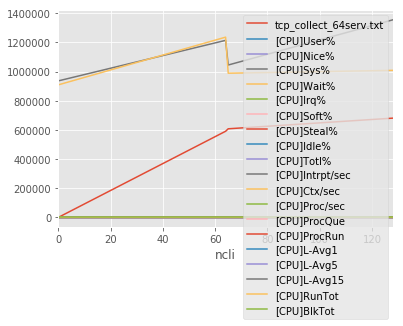

In [67]:
data.groupby(["ncli"]).mean().plot()
plt.show()

In [101]:
for fname in [
    #"tcp_collect_32serv_2.dat",
    #"tcp_collect_32serv_0.dat"
]:
    aggregate_multiserv(os.path.join(home, fname), results["tcp_32core_collectl"])

for fname in [
    #"tcp_collect_1serv_1.dat",
    #"tcp_collect_1serv_2.dat",
    #"tcp_collect_1serv_0.dat"
]:
    aggregate_multiserv(os.path.join(home, fname), results["tcp_1core_collectl"], 1)
    
    
for fname in [
    "tcp_1.dat",
    "tcp_2.dat",
    "tcp_3.dat",
]:
    aggregate_multiserv(os.path.join(home, fname), results["tcp_32core"])

In [10]:
gps = []

for ftype, fname in sorted(results.items()):
    df = load_datfile(os.path.join(home, fname), ftype)
    gps.append(df.groupby("ncli"))
    
cpu_means = get_collectl_means(["tcp_collect_32serv_1.dat","tcp_collect_32serv_2.dat"])

In [13]:
fig = {
    'data': [
        {
            'x': gp.mean().index,
            'y': gp.mean()[gp.mean().columns[0]],
            'name': gp.mean().columns[0],
            'error_y': dict(
                type='data',
                array=gp.std()[gp.std().columns[0]],
                visible=True
            ),
        } for gp in gps]
    ,
    'layout': {
        'xaxis': {'title': '# clients', 'type': 'log'},
        'yaxis': {'title': 'throughput (pps)'},
        'title': 'Small-packet throughput'
    }
}

py.iplot(fig, filename="somefilename")

In [136]:
traces = [Scatter(
    x = gp.mean().index,
    y = gp.mean()[gp.mean().columns[0]],
    name = gp.mean().columns[0],
    error_y = dict(
        type='data',
        array=gp.std()[gp.std().columns[0]],
        visible=False
    )
) for gp in gps]

trace2 = Bar(
    x = 2**(means.index + 5),
    y = means["[CPU]Totl%"],
    yaxis = 'y2',
    name = 'tcp_cpu_32serv',
    width = (2**(means.index + 5))/32
)

data = traces + [trace2]

layout = Layout (
    xaxis = {'title': '# clients', 'type': 'log'},
    yaxis = {'title': 'throughput (pps)', 'range':[0,1800000]},
    yaxis2 = {'title': 'Total CPU utilization', 
              'side': 'right', 
              'overlaying': 'y',
              'showgrid': False},
    title = 'Small-packet throughput',
    legend = {'x': 0.01, 'y': 1}
)

fig = Figure(data=data, layout=layout)

py.iplot(fig, filename='cpu-throughput')

In [29]:
# This is just in case I want to use plt; identical in what gets plotted
# to the plotly script

"""
fig, ax = plt.subplots(figsize=(8,6))

for gp in gps:
    gp.mean().plot(ax=ax, 
                   yerr=gp.std(),
                  )

ax.title.set_text("Small-packet throughput")

ax.set_xlabel("# clients")
ax.set_ylabel("throughput (pps)")

ax.set_xscale('log', basex=2)
#ax.set_yscale('log', basey=10)
        
ax.legend(loc=2)

plt.show()
"""

'\nfig, ax = plt.subplots(figsize=(8,6))\n\nfor gp in gps:\n    gp.mean().plot(ax=ax, \n                   yerr=gp.std(),\n                  )\n\nax.title.set_text("Small-packet throughput")\n\nax.set_xlabel("# clients")\nax.set_ylabel("throughput (pps)")\n\nax.set_xscale(\'log\', basex=2)\n#ax.set_yscale(\'log\', basey=10)\n        \nax.legend(loc=2)\n\nplt.show()\n'